# Dog-Breed-Identifier

## 1. Problem

To identify the type of dog breed.

## 2. Data

We're using the data from kaggle's dog breed identification competition.

## 3. Evalutaion

The evaluation is a file with prediction probabilties for each dog breed of each image.

## 4. Features

* Dealing with images (unstructured data) - use deep learning/transfer learning 
* 120 dog breeds
* 10000+ images in training set (labelled)
* 10000+ images in test set (unlabelled)

In [ ]:
# Unzip the zip file
# !unzip "drive/MyDrive/dog vision/dog-breed-identification.zip" -d "drive/MyDrive/dog vision"

## Get workspace ready

* import tensorflow
* import tensorflow hub
* make sure we're using a GPU

In [ ]:
# import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF version: ", tf.__version__)
print("TF Hub version: ", hub.__version__)

#check for GPU availability
print("GPU", "available :)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version:  2.8.0
TF Hub version:  0.12.0
GPU available :)


## Getting our data ready (Turning data into tensors)

Turning images to numbers.

Our data has to be in numerical format.

In [ ]:
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/dog vision/labels.csv")

print(labels_csv.describe())
print(labels_csv.head())
print(labels_csv.shape[0])

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever
10222


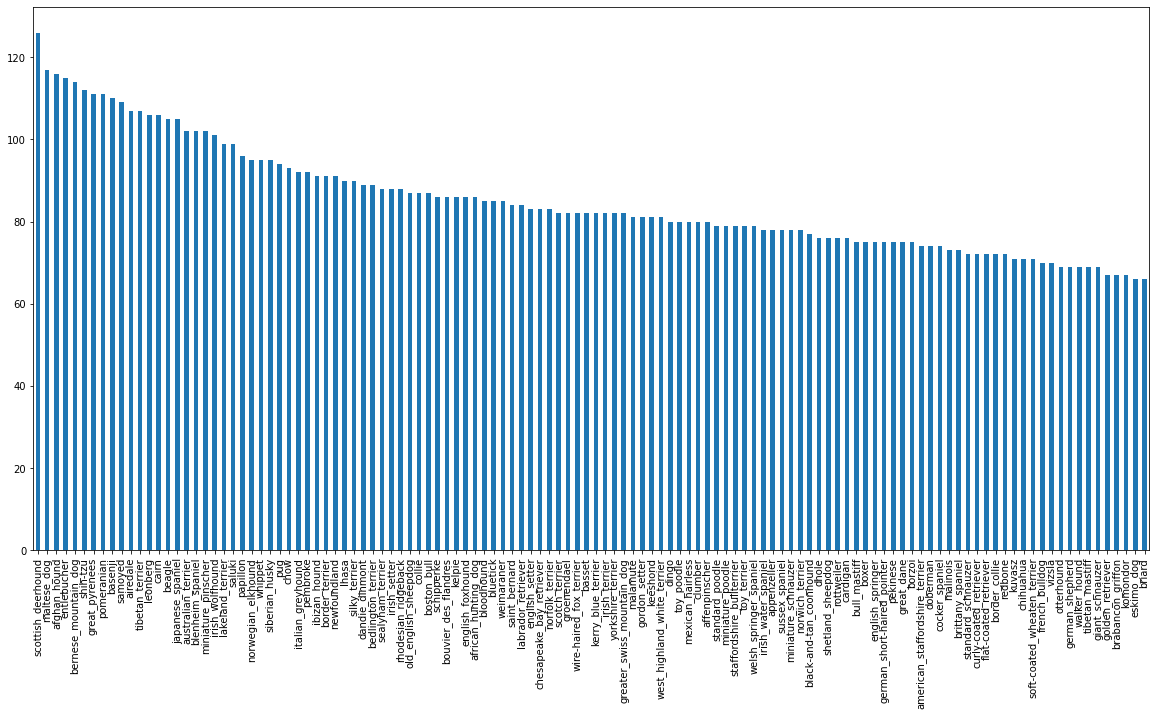

In [ ]:
# Visualize no. of diff. types of breeds

labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

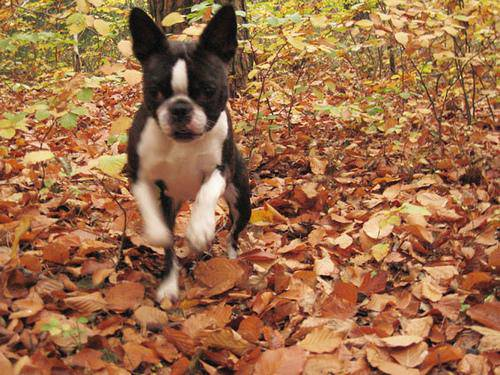

In [ ]:
from IPython.display import Image
Image("drive/My Drive/dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

## Getting images and labels ready

Create a list with image file pathnames

### Getting our images ready

In [ ]:
# Create pathnames from image id's
filenames = ["drive/My Drive/dog vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]
filenames[:10]

['drive/My Drive/dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/dog vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/dog vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/dog vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/dog vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/dog vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/dog vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/dog vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
import os
print("Items in train folder: ", len(os.listdir("drive/My Drive/dog vision/train")))
print("Items in filenames list: ", len(filenames))

Items in train folder:  10222
Items in filenames list:  10222


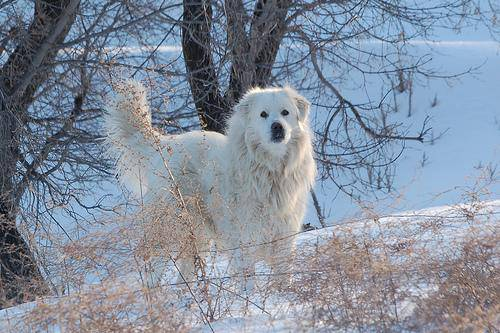

In [ ]:
Image(filenames[6666])

In [ ]:
labels_csv["breed"][6666]

'great_pyrenees'

### Getting our labels ready

In [ ]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
# Check if number of labels is equal to number of filenames
print(len(labels))
print(len(filenames))

10222
10222


In [ ]:
# Check number of unique breeds
unique_breeds=np.unique(labels)
len(unique_breeds)

120

In [ ]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
# Turn a single label into a boolean array
print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn all labels into a boolean arrays
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# Turning boolean into integer arrays
print(labels[0]) # Original label
print(np.where(labels[0]==unique_breeds)) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # show boolean array in 0's and 1's

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Creating our own validation set

The kaggle dataset doesn't come with a validation set, so we create our own validation set

In [ ]:
# Set up X and y variables
X = filenames
y = boolean_labels

In [ ]:
len(X)

10222

Let's start experimenting with 1000 images and increase as we need.

In [ ]:
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
X_train[:5],y_train[:2]

(['drive/My Drive/dog vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/dog vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/dog vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/dog vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/dog vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, Fa

## Preprocessing Images (Turning our images into tensors)

Create a function with follwing steps:

1. Take an image filepath as input.
2. Use tensorflow to read the file and save it into a variable `image`.
3. Turn the `image` into tensor.
4. Normalize our data.(Convert color channel valus from 0-255 to 0-1)
4. Resize the `image` into shape(224,224).
5. Return the modified `image`.

Let's see what importing an image looks like.

In [ ]:
from matplotlib.pyplot import imread
image=imread(X[66])
image.shape

(375, 500, 3)

In [ ]:
len(image), image.max(), image.min()

(375, 255, 0)

In [ ]:
# Turn our image to tensor
tf.constant(image)

<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[102,  82,  45],
        [102,  83,  43],
        [120,  98,  57],
        ...,
        [249, 255, 233],
        [247, 255, 231],
        [247, 255, 231]],

       [[192, 169, 137],
        [219, 196, 162],
        [195, 172, 131],
        ...,
        [251, 255, 241],
        [250, 254, 240],
        [250, 254, 240]],

       [[248, 222, 195],
        [234, 208, 175],
        [190, 163, 120],
        ...,
        [253, 253, 253],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[ 79,  58,  57],
        [ 68,  49,  45],
        [ 79,  63,  50],
        ...,
        [ 97,  80,  62],
        [100,  83,  65],
        [104,  87,  69]],

       [[ 67,  46,  45],
        [ 54,  35,  31],
        [ 64,  48,  35],
        ...,
        [109,  92,  74],
        [115,  98,  80],
        [113,  96,  78]],

       [[ 47,  26,  25],
        [ 43,  24,  20],
        [ 61,  45,  32],
        ...,
        [134, 117,  9

### Creating the function to preprocess images

In [ ]:
# Set the image size
IMG_SIZE = 224

# Define the preprocessing image function n take image path as input
def process_image(image_path):
  # Read an image file
  image = tf.io.read_file(image_path)
  #Turn jpg file to numerical tensor with 3 color channels
  image = tf.image.decode_jpeg(image, channels=3)
  #Convert the color channels values from 0-255 to 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)
  #Resize the image into 224x224
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

## Turning our data into batches

If you try to process 10000+ images at once, they all might not fit into memory

So that's y we do 32 (batch size) images at once (you can manually adjust batch size)

In order to use Tensorflow effectively, we need to use data in form of tensor tuples: `(image, label)`

In [ ]:
# Create a funciton to return a tuple

def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

In [ ]:
#Demo of image_label tuple
process_image(X[42]), tf.constant(y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

### Create a function to convert the data into batches

In [ ]:
# Define a batch size.....32 is best
BATCH_SIZE = 32

# Define the function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of X and y pairs
  Shuffles all data if it's training data, doesn't shuffle if it's validation data.
  Also accepts test data as input.(no labels)
  """
  # if the data is a test datset, then there are no labels...
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X)) # Only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # if the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y))) # filepaths n labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  # if the data is training data, then we have to shuffle it
  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    # Shuffle filepaths n labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))
    # Create filepath n label tuples (this also preprocess images)
    data = data.map(get_image_label)
    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)

    return data_batch

In [ ]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
# Check attributes of training and validation data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing data batches

Our data is in batches now, but it's hard to understand. So, let's visualize the batches

In [ ]:
import matplotlib.pyplot as plt

# Create a function fpr viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [ ]:
unique_breeds[y[0].argmax()]

'boston_bull'

In [ ]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

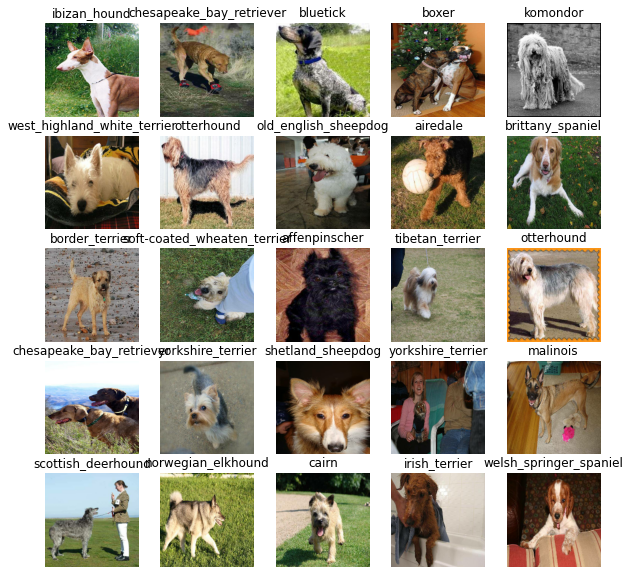

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

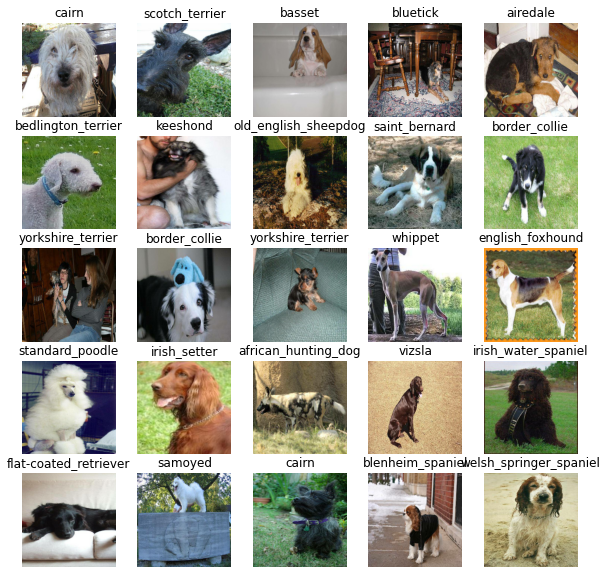

In [ ]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model

Before we build a model, there are a few things we need to define:
* The input shape of our model (our images shape in form of tensors)
* The output shape of our model (image labels in form of tensors)
* The URL of the model we want to use from Tensorflow Hub - https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5

In [ ]:
# Setup input shape to our model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, weight, color channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from Tensorflow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

Now we've got our inputs, outputs and model ready to go.
Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which:
* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a Keras model in sequential fashion (do this first, then this, then that).
* Compiles the model (says it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting).
* Returns the model.

All of these steps can be found here - https://www.tensorflow.org/guide/keras/sequential_model

In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with: ", model_url)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=output_shape, 
                          activation="softmax") # Layer 2 (output layer)                        
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(input_shape)

  return model

In [ ]:
model = create_model()
model.summary()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [ ]:
len(X_val)

200

In [ ]:
len(X_train)

800

## Creating Callbacks

Callbacks are helper functions that a model can use during training to do things such as save its progress, check its progress or stop training early if model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for stopping our model from learning too long.

### TensorBoard Callbacks

To setup a TensorBoard callback, we need to do 3 things:
1. Load the TensorBoard notebook extension.
2. Create a tensorboard callback which is able to save logs to a directory and pass it to our model's `fit` function.
3. Visualize our models training logs with the `%tensorboard` magic function (we'll do this after training)

In [ ]:
# Load Tensorboard notebook entension
%load_ext tensorboard

In [ ]:
import datetime

# Create a funciton to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory to store Tensorboard logs
  logdir = os.path.join("drive/MyDrive/dog vision/logs",
                        #Make it so logs get tracked whenever we run an experiment)
                        datetime.datetime.now().strftime("%d%m%Y-%H%M%S"))
  
  return tf.keras.callbacks.TensorBoard(logdir)

### Early Stopping Callback

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [ ]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3)

## Training our model (on subset of data)

Our first model is only going to train on 1000 images, to make sure everything is working.

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

Let's create a function which trains a model.

* Create a model using `create_model()`
* Setup a TensorBoard callback using `create_tensorboard_callback()`
* Call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for (`NUM_EPOCHS`) and the callbacks we'd like to use.
* Return the model

In [ ]:
# Build a model to train and return the trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model=create_model()

  # Create a new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted mode
  return model

In [ ]:
model=train_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 110s 3s/step - loss: 4.5499 - accuracy: 0.0988 - val_loss: 3.3649 - val_accuracy: 0.2900
Epoch 2/100
25/25 [==============================] - 3s 120ms/step - loss: 1.5996 - accuracy: 0.7100 - val_loss: 2.1417 - val_accuracy: 0.5250
Epoch 3/100
25/25 [==============================] - 3s 119ms/step - loss: 0.5425 - accuracy: 0.9413 - val_loss: 1.6833 - val_accuracy: 0.6150
Epoch 4/100
25/25 [==============================] - 3s 118ms/step - loss: 0.2429 - accuracy: 0.9912 - val_loss: 1.5055 - val_accuracy: 0.6300
Epoch 5/100
25/25 [==============================] - 3s 120ms/step - loss: 0.1419 - accuracy: 0.9975 - val_loss: 1.4231 - val_accuracy: 0.6500
Epoch 6/100
25/25 [==============================] - 4s 149ms/step - loss: 0.0970 - accuracy: 1.0000 - val_loss: 1.3655 - val_accuracy: 0.6600
Epoch 7/100
25/25 [==============================

Our model is overfitting.

## Checking the Tensorboard Logs

The Tensorboard magic function (`%tensorboard`) will access the logs directory we created earlier and visualize its contents.

In [ ]:
%tensorboard --logdir drive/My\ Drive/dog\ vision/logs

<IPython.core.display.Javascript object>

## Making and evaluating predictions using a trained model



In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 4s 95ms/step


array([[6.1628391e-04, 1.2637192e-04, 6.8215434e-03, ..., 2.7626409e-04,
        3.1964169e-05, 3.5219083e-03],
       [9.3164376e-04, 3.0708028e-04, 9.0297498e-03, ..., 3.0661761e-04,
        2.5167458e-03, 8.4257073e-04],
       [9.0555041e-05, 2.9150207e-04, 2.6352401e-04, ..., 2.5522534e-04,
        7.5729928e-05, 1.0488751e-04],
       ...,
       [1.6140535e-05, 1.1013446e-04, 8.2328937e-05, ..., 5.2461430e-05,
        4.4571356e-05, 7.0088799e-04],
       [1.8561064e-03, 1.4952963e-04, 6.7360123e-04, ..., 3.8442569e-04,
        2.7909386e-05, 4.8168008e-03],
       [7.2126958e-04, 1.4808236e-05, 3.9788629e-03, ..., 2.9555361e-03,
        1.5574773e-03, 5.1648944e-04]], dtype=float32)

In [ ]:
# The above array is of shape (200, 120), in which each single 1-D array 

unique_breeds[np.argmax(predictions[2])]

'basset'

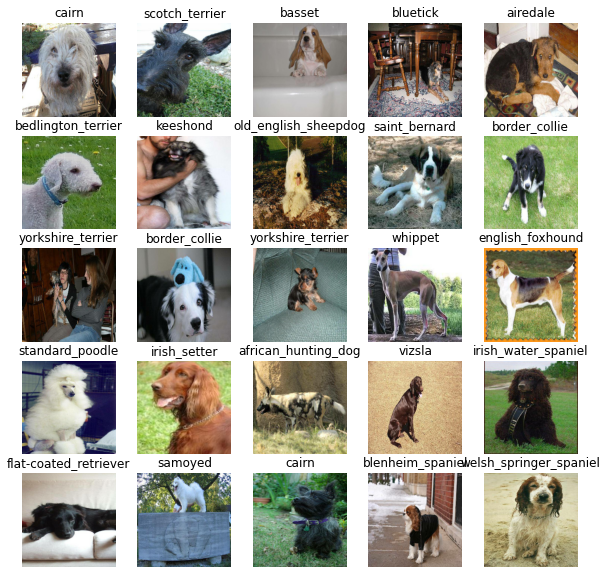

In [ ]:
show_25_images(val_images, val_labels)

In [ ]:
# Turn prediction probabilities into their respective labels.
def get_pred_label(prediction_probabilities):
  """
  Turns an array of predicition probabilities into labels.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

In [ ]:
pred_label = get_pred_label(predictions[81])
pred_label

'irish_setter'

Now since our validation data is still in batch dataset, we'll have to unbatchify it to make predictions on the validation images and then compare those predictions to the validation labels (truth labels).

In [ ]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Unbatches a batch dataset of (image, label) tensors and returns seperate arrays.
  """
  images=[]
  labels=[]
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

In [ ]:
val_images, val_labels = unbatchify(val_data)

In [ ]:
val_labels[10]

'yorkshire_terrier'

Now we've got ways to get:
* Prediction labels
* Validation labels (true labels)
* Validation images

Let's make some function to visualize these a bit more

We'll create a function which:
* Takes an array of prediction probabilities, an array of truth labels, an array of images and an integer.
* Convert the prediciton probabilities to a predicted label.
* Plot the predicted label, its predicted probabiltity, the truth label and the target image on a single plot.

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the predicitons, ground truth and iamge for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if(pred_label==true_label):
    color="green"
  else:
    color="red"

  # Change plot title to be predicted, probability of predicitions and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
            color=color)

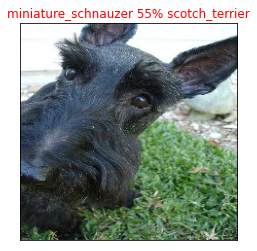

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=1)

In [ ]:
count=[]
for i in range(200):
  if (get_pred_label(predictions[i]) == val_labels[i]):
    count.append(i)

In [ ]:
len(count)

130

Now we've got oe function to visualize our models top predicitons, let's make another to view our models top 10 predicitons.
THis function will:
* Take an input of prediction probabilties array and a ground truth array and an integer.
* Find the prediciton using `get_pred_labe()`
* Find the top 10:
  * Prediction probabilities indexes
  * Prediction probabilties values
  * Prediction labels
* Plot the top 10 prediction probability values and labels, coloring the true label green.

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plot the top 10 highest predictions confidences alonf with the truth label for sample.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # setup the plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  # Change the color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

In [ ]:
predictions[0]

array([6.16283913e-04, 1.26371917e-04, 6.82154344e-03, 1.45461439e-04,
       1.65702484e-04, 3.39623330e-05, 9.46719013e-03, 1.01200270e-03,
       1.49926316e-04, 2.94587272e-03, 8.66790186e-04, 7.52084525e-05,
       5.20609552e-04, 3.70071095e-04, 4.59296367e-04, 1.21134959e-04,
       2.18462428e-05, 1.64907247e-01, 1.87770620e-05, 8.61147873e-06,
       8.16009939e-04, 3.41865118e-04, 6.00431740e-05, 1.65095832e-03,
       1.18887991e-04, 2.86409690e-04, 2.43877083e-01, 2.82119797e-03,
       3.91787122e-04, 1.12321542e-03, 6.67140339e-05, 7.07636413e-04,
       4.17611212e-04, 3.05490539e-04, 5.09106030e-04, 1.50878914e-02,
       1.53656820e-05, 2.09500431e-04, 3.06269998e-04, 4.41937998e-04,
       1.14447735e-02, 8.86040289e-05, 3.93128503e-05, 2.69933895e-04,
       2.85120332e-05, 6.32114316e-05, 2.24161122e-05, 2.72137055e-04,
       2.53003236e-04, 7.08427469e-05, 2.91565870e-04, 6.81191814e-05,
       7.72345462e-04, 2.96881597e-04, 1.06131902e-05, 5.08306694e-05,
      

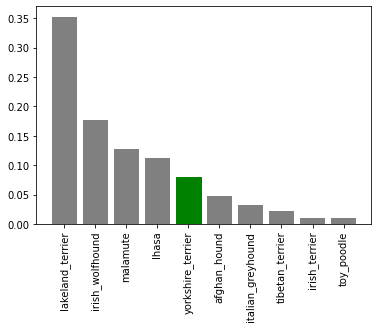

In [ ]:
plot_pred_conf(prediction_probabilities=predictions, labels = val_labels,n=10)

<function matplotlib.pyplot.show>

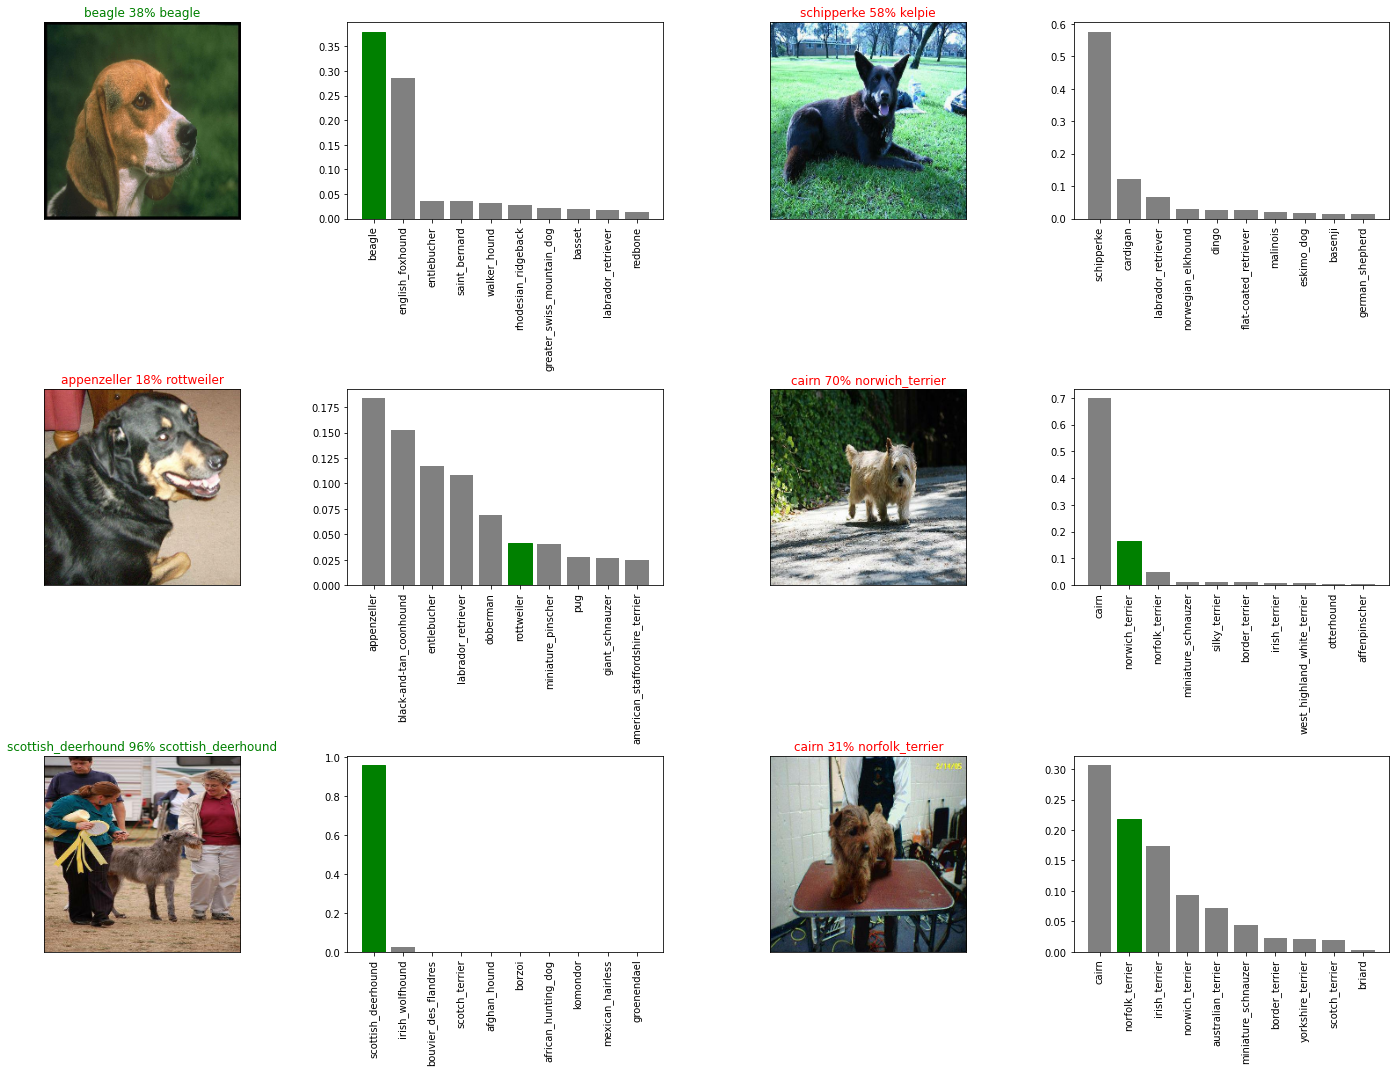

In [ ]:
# Let's check out a few predictions and their different values
i_multiplier=120
num_rows=3
num_cols=2
num_images=num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show


**Challenge:** Create a confusion matrix with our models predicted and true labels

## Saving and reloading a trained model


In [ ]:
# Create a function to save our model
def save_model(model, suffix=None):
  """
  Saes a given model in a models driectory and appends a suffix(string)
  """
  # Create a model directory with pathname with current time
  modeldir = os.path.join("drive/My Drive/dog vision/models",
                          datetime.datetime.now().strftime("%d%m%Y-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [6]:
# Create a function to load a  trained model
import tensorflow as tf
import tensorflow_hub as hub
def load_model(model_path):
  """
  Loads a saved modl from a specified path.
  """
  print(f"Loading saved model from {model_path}...")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

Check the save and load functions

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetV2-Adam")

Saving model to: drive/My Drive/dog vision/models/15052022-17591652637550-1000-images-mobilenetV2-Adam.h5...


'drive/My Drive/dog vision/models/15052022-17591652637550-1000-images-mobilenetV2-Adam.h5'

In [ ]:
# Load a trained model
loaded_1000_image_model = load_model("drive/My Drive/dog vision/models/15052022-09481652608110-1000-images-mobilenetV2-Adam.h5")

Loading saved model from drive/My Drive/dog vision/models/15052022-09481652608110-1000-images-mobilenetV2-Adam.h5...


In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 83ms/step - loss: 1.2995 - accuracy: 0.6500


[1.2995167970657349, 0.6499999761581421]

In [ ]:
# Evaluate laoded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 83ms/step - loss: 1.2995 - accuracy: 0.6500


[1.2995167970657349, 0.6499999761581421]

## Training a big dog model (on the full data)

In [ ]:
# Create a data batch with the full data
full_data = create_data_batches(X, y)

Creating training data batches...


In [ ]:
full_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# Create a model for full model
full_model = create_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [ ]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

**Note:** Running the cell below will take a while (upto 30min for first epoch) because the GPU we're using in the runtime has to load all of the images into memory. 

In [ ]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 39s 109ms/step - loss: 1.3318 - accuracy: 0.6717
Epoch 2/100
320/320 [==============================] - 36s 113ms/step - loss: 0.4083 - accuracy: 0.8805
Epoch 3/100
320/320 [==============================] - 38s 118ms/step - loss: 0.2407 - accuracy: 0.9330
Epoch 4/100
320/320 [==============================] - 38s 119ms/step - loss: 0.1577 - accuracy: 0.9631
Epoch 5/100
320/320 [==============================] - 37s 115ms/step - loss: 0.1082 - accuracy: 0.9781
Epoch 6/100
320/320 [==============================] - 39s 121ms/step - loss: 0.0777 - accuracy: 0.9865
Epoch 7/100
320/320 [==============================] - 37s 117ms/step - loss: 0.0596 - accuracy: 0.9905
Epoch 8/100
320/320 [==============================] - 38s 119ms/step - loss: 0.0457 - accuracy: 0.9936
Epoch 9/100
320/320 [==============================] - 38s 119ms/step - loss: 0.0374 - accuracy: 0.9958
Epoch 10/100
320/320 [==============================] - 39s 122m

In [ ]:
save_model(full_model, suffix="full-image-set-mobilenetV2-Adam")

Saving model to: drive/My Drive/dog vision/models/15052022-18151652638559-full-image-set-mobilenetV2-Adam.h5...


'drive/My Drive/dog vision/models/15052022-18151652638559-full-image-set-mobilenetV2-Adam.h5'

In [7]:
# Load in the full model
loaded_full_model = load_model("drive/My Drive/dog vision/models/15052022-18151652638559-full-image-set-mobilenetV2-Adam.h5")

Loading saved model from drive/My Drive/dog vision/models/15052022-18151652638559-full-image-set-mobilenetV2-Adam.h5...


## Make predictions on the test dataset

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we craeted`create_data_batches()` earlier which can take a list of filenames as input and convert them into Tensor batches.

To make predictions on the test data, we'll:
* Get the test images filenames.
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True` (since the test data doesn't have labels)
* Make a prediction array by passing the test batches to the `predict()` method called on our model.

In [ ]:
# Load test image filenames
test_path = "drive/My Drive/dog vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/My Drive/dog vision/test/dd2c0c44f98af0cf223572a1aa189779.jpg',
 'drive/My Drive/dog vision/test/df2b5cee4b3d8a3cb893b668df16d572.jpg',
 'drive/My Drive/dog vision/test/e411a1b3681604f6321af7cb8e8f2de7.jpg',
 'drive/My Drive/dog vision/test/e6223aba45a94c9ac349967ed946d0f7.jpg',
 'drive/My Drive/dog vision/test/e218c0da622fedc975a97999ad7d48a5.jpg',
 'drive/My Drive/dog vision/test/e26901a9e04f0ba89765fb9b9b7f675f.jpg',
 'drive/My Drive/dog vision/test/e647098485898391b700270c61824282.jpg',
 'drive/My Drive/dog vision/test/e43f6e621469f438f351d31d889b839f.jpg',
 'drive/My Drive/dog vision/test/e4c49d7e028965d3504b0862633464c3.jpg',
 'drive/My Drive/dog vision/test/dff4932a639f0bf9b1e693fff89fc898.jpg']

In [ ]:
# Create a test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


**Note:** Calling `predict()` on our full model and passing it the test data batch will take a long time to run (about ~1 hr). This is because we have to process 10000+ images and get our model to find patterns in those images and generate predictions based on what its learned in the training dataset.

In [ ]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 1051s 3s/step


In [ ]:
# Save predictions to csv file
np.savetxt("drive/My Drive/dog vision/preds_array.csv", test_predictions, delimiter=",")

In [ ]:
# Load predictions from csv file
test_predictions = np.loadtxt("drive/My Drive/dog vision/preds_array.csv", delimiter=",")

In [ ]:
test_predictions[:10]

array([[8.66508984e-04, 4.22444937e-05, 2.96077960e-05, ...,
        1.54009598e-04, 2.18307960e-05, 1.85663975e-03],
       [3.88842192e-03, 1.84570687e-04, 2.96250437e-05, ...,
        1.00208097e-04, 1.82102632e-03, 2.46132025e-03],
       [2.40878365e-03, 1.10962981e-04, 1.36850514e-02, ...,
        1.03331609e-02, 8.62702914e-03, 5.63200796e-03],
       ...,
       [8.13873339e-05, 1.40550663e-04, 3.05984839e-04, ...,
        5.73092439e-05, 9.31543240e-04, 2.83956731e-04],
       [4.00797086e-04, 3.09435651e-04, 1.01295818e-05, ...,
        9.66753032e-06, 2.45131241e-06, 1.72408050e-04],
       [8.33819732e-02, 9.75326635e-04, 1.16057752e-03, ...,
        4.31997556e-04, 1.50393194e-03, 2.00886792e-03]])

## Preparing the dataset predictions for Kaggle

Looking at the Kaggle sample submission, we find that it wants our models prediction probability outputs in a DataFrame with an ID and a column for each diffrent dog breed.
https://www.kaggle.com/c/dog-breed-classification/overview/evaluation

To get the data in this format, we'll:
* Create a pandas DataFrame with an ID column as well as a column for each dog breed.
* Add data to the ID column by extracting the test image ID's from their filepaths.
* Add data (the prediction probabilities) to each of the dog breed columns.
* Export the DataFrame as a CSV to submit it to Kaggle.

In [ ]:
# Create a pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [ ]:
# Append test image ID's to predictions to DataFrame
test_ids = [os.path.splitext(path) for path in os.listdir(test_path)]

In [ ]:
os.path.splitext(test_filenames[0])

('drive/My Drive/dog vision/test/dd2c0c44f98af0cf223572a1aa189779', '.jpg')

In [ ]:
preds_df["id"] = test_ids

In [ ]:
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,"(dd2c0c44f98af0cf223572a1aa189779, .jpg)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"(df2b5cee4b3d8a3cb893b668df16d572, .jpg)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"(e411a1b3681604f6321af7cb8e8f2de7, .jpg)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"(e6223aba45a94c9ac349967ed946d0f7, .jpg)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"(e218c0da622fedc975a97999ad7d48a5, .jpg)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Add the predictions probabilties to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,"(dd2c0c44f98af0cf223572a1aa189779, .jpg)",0.000867,0.000042,0.000030,0.000046,0.001449,0.000107,0.000576,0.000413,0.000059,...,0.000185,0.000683,0.000109,0.000106,0.000218,0.000034,0.000117,0.000154,0.000022,0.001857
1,"(df2b5cee4b3d8a3cb893b668df16d572, .jpg)",0.003888,0.000185,0.000030,0.000620,0.000068,0.000090,0.000573,0.000412,0.000479,...,0.003630,0.000108,0.000205,0.000225,0.000325,0.000094,0.008949,0.000100,0.001821,0.002461
2,"(e411a1b3681604f6321af7cb8e8f2de7, .jpg)",0.002409,0.000111,0.013685,0.000369,0.001885,0.001239,0.000644,0.021049,0.176724,...,0.001230,0.011179,0.001621,0.077702,0.000168,0.032202,0.003214,0.010333,0.008627,0.005632
3,"(e6223aba45a94c9ac349967ed946d0f7, .jpg)",0.000665,0.023216,0.001784,0.000502,0.000148,0.000471,0.002592,0.000396,0.000154,...,0.000711,0.000265,0.000208,0.000362,0.000455,0.000191,0.000277,0.000243,0.000528,0.002218
4,"(e218c0da622fedc975a97999ad7d48a5, .jpg)",0.000178,0.000004,0.000002,0.000003,0.000110,0.000013,0.000394,0.000311,0.000076,...,0.002615,0.000022,0.000004,0.000051,0.000012,0.000031,0.001804,0.000003,0.000001,0.003772


In [ ]:
preds_df.to_csv("drive/My Drive/dog vision/full_model_predictions_submission_1_mobilenetV2.csv",
                index=False)